학습용 고양이 이미지 전체 개수 :  1000
학습용 강아지 이미지 전체 개수 :  1000
검증용 고양이 이미지 전체 개수 :  500
검증용 강아지 이미지 전체 개수 :  500
테스트용 고양이 이미지 전체 개수 :  500
테스트용 강아지 이미지 전체 개수 :  500
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (No

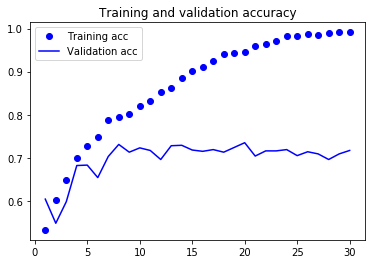

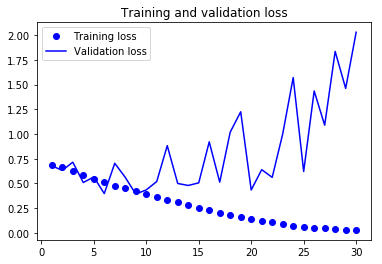

In [10]:
import os, shutil
original_dataset_dir = './train' # 원본 데이터셋 디렉터리 경로

base_dir = './train_small' # 소규모 데이터셋 저장할 디렉터리
os.mkdir(base_dir)

# 학습, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') # 학습용 고양이 사진 디렉터리
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') # 학습용 강아지 사진 디렉터리
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') # 검증용 고양이 사진 디렉터리
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 검증용 장아지 디렉터리
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') # 테스트용 고양이 사진 디렉터리
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') # 테스트용 강아지 사진 디렉터리 
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지 validation_cats_dir에 복사 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지 test_cats_dir에 복사 
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지 train_cats_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지 validation_cats_dir에 복사 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지 test_cats_dir에 복사 
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('학습용 고양이 이미지 전체 개수 : ', len(os.listdir(train_cats_dir)))
print('학습용 강아지 이미지 전체 개수 : ', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수 : ', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수 : ', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수 : ', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수 : ', len(os.listdir(test_dogs_dir)))

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator
# 모든 이미지를 1/255로 스케일 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), # 모든 이미지 150 * 150 크기로 변경
    batch_size = 20,
    class_mode='binary') # binary_crossentropy 손실을 사용하기때문에 이진 레이블 필요
    
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150), # 모든 이미지 150 * 150 크기로 변경
    batch_size = 20,
    class_mode='binary') # binary_crossentropy 손실을 사용하기때문에 이진 레이블 필요
   
# 배치 제너레이터를 사용하여 모델 학습하기
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
 
model.save('cats_and_dogs_small_1.h5') # 모델저장

# 학습의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()